In [6]:
import os
import subprocess
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = './data/'
data_list = [data_path + s for s in os.listdir(data_path)]
data_list

['./data/data004',
 './data/data005',
 './data/data003',
 './data/data002',
 './data/data001']

In [3]:
raw_data = {'Cache_Size': [], 'LRU': [], 'TWO_Q 20': [], 'TWO_Q 30': [], 'TWO_Q 40': []}

cache_ratio = 20
data = data_list[2]

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['Cache_Size'].append(cache_size)
    raw_data['LRU'].append(float(ratio[3]))
    raw_data['TWO_Q 20'].append(float(ratio[4]))

cache_ratio = 30

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['TWO_Q 30'].append(float(ratio[4]))

cache_ratio = 40

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['TWO_Q 40'].append(float(ratio[4]))

In [4]:
# ratio 20
df_hitRatio = pd.DataFrame.from_dict(raw_data)
df_hitRatio = df_hitRatio.set_index('Cache_Size')
df_hitRatio

,LRU,TWO_Q 20,TWO_Q 30,TWO_Q 40
Cache_Size,,,,
100,35.1,42.5,41.9,41.1
200,44.2,49.8,49.2,48.5
300,48.9,53.8,53.4,52.8
400,51.9,56.5,56.2,55.7
500,54.3,58.5,58.3,57.8
600,56.2,60.2,60.0,59.4
700,57.7,61.5,61.3,60.8
800,59.0,62.7,62.4,62.0
900,60.0,63.7,63.4,63.0


Text(0, 0.5, 'Hit ratio')

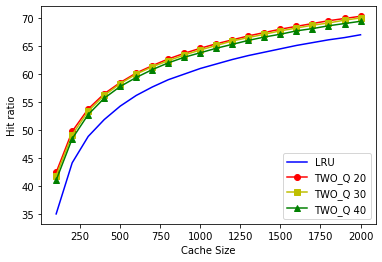

In [14]:
#data4
df_hitRatio.plot(style=['-','o-','s-','^-'],color=['b','r','y','g'])
plt.xlabel("Cache Size")
plt.ylabel("Hit ratio")
